In [1763]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

<br>

## Merge Data

In [1764]:
d = pd.read_csv(r'https://raw.githubusercontent.com/GrzegorzPus/NBA_analysis/main/Data/draft-data-20-years.csv')
d.head(3)

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990


In [1765]:
d2 = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/NBA_analysis/main/Data/player_data.csv')

In [1766]:
merged_df = d.merge(d2, on='Player', how='left')
merged_df = merged_df.drop(['playerurl', 'From', 'To','Colleges'], axis=1)

In [1767]:
merged_df.head(3)

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,DraftYr,MPG,PPG,RPG,APG,DraftYear,Pos,Ht,Wt,Birth Date
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,1990,33.2,16.5,9.3,2.5,1990,F-C,6-10,230.0,June 21 1967
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,1990,35.3,16.3,3.9,6.7,1990,NaN,NaN,NaN,NaN
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,1990,26.7,14.6,1.9,3.5,1990,G,6-1,162.0,March 9 1969


In [1768]:
d3 = pd.read_csv(r"C:\Users\GRZEGORZ\OneDrive\Pulpit\Portfolio_Projects\players.csv")

In [1769]:
d3 = d3.rename(columns={'name': 'Player'})
selected_columns = d3[["Player"] + list(d3.columns[1:3]) + ["height"] + list(d3.columns[21:24])]
result = pd.merge(d, selected_columns, on="Player", how="left")

In [1770]:
merged_df1 = merged_df[['Player', 'Ht']]
result1 = result[['Player', 'height']]

merged_df1 = merged_df1.merge(result1, on='Player', how='left')
merged_df1['Ht'].fillna(merged_df1['height'], inplace=True)
merged_df1.drop('height', axis=1, inplace=True)

merged_df2 = merged_df[['Player', 'Wt']]
result2 = result[['Player', 'weight']]

merged_df2 = merged_df2.merge(result2, on='Player', how='left')
merged_df2['Wt'].fillna(merged_df2['weight'], inplace=True)
merged_df2.drop('weight', axis=1, inplace=True)

merged_df3 = merged_df[['Player', 'Birth Date']]
result3 = result[['Player', 'birthDate']]

merged_df3 = merged_df3.merge(result3, on='Player', how='left')
merged_df3['Birth Date'].fillna(merged_df3['birthDate'], inplace=True)
merged_df3.drop('birthDate', axis=1, inplace=True)

In [1771]:
m = pd.merge(merged_df1, merged_df2, on="Player", how="left")

In [1772]:
merged_all = pd.merge(m, merged_df3, on="Player", how="left")

In [1773]:
aw = pd.merge(d, merged_all, on="Player", how="left")

<br>

## Advanced Career Statistics

In [1774]:
data = aw.drop_duplicates().reset_index()

In [1775]:
data.rename(columns={'Ht':'Height', 'Wt': 'Weight'}, inplace=True)

In [1776]:
col_to_drop = ['playerurl', 'Rk', 'DraftYr', 'WS', 'College', 'index', 'Unnamed: 0']
data = data.drop(columns=col_to_drop)
data.head(3)

,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight,Birth Date
0,1,BRK,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,1.4,22.3,33.2,16.5,9.3,2.5,1990,6-10,230.0,June 21 1967
1,2,OKC,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,3.3,62.5,35.3,16.3,3.9,6.7,1990,6-4,180lb,"July 23, 1968"
2,3,DEN,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,-0.8,4.5,26.7,14.6,1.9,3.5,1990,6-1,162.0,March 9 1969


- **Pk**: Draft pick oznacza to, że dana drużyna ma prawo do wyboru określonego zawodnika na określonej pozycji w hierarchii draftu
- **Tm**: Drużyna
- **Player**: Zawodnik
- **Yrs**: Lata spędzone w lidze NBA
- **G**: Rozegrane mecze w całej karierze
- **TOTMP**: Łączna ilość minut rozegranych przez zawodnika w karierze
- **TOTPTS**: Łączna ilość zdobytych punktów zawodnika w karierze
- **TOTTRB**: Łączna ilość zbiórek zawodnika w karierze
- **TOTAST**: Łączna ilość asyst zawodnika w karierze
- **FG%**: Procent trafionych rzutów przez zawodnika w karierze
- **3P%**: Procent trafionych rzutów za 3 punkty przez zawodnika w karierze
- **FT%**: Procent trafionych rzutów wolnych przez zawodnika w karierze
- **WS/48**: Udziały zawodnika w zwycięstwach na 48 minut
- **BPM**: Wskaźnik, który szacuje wkład zawodnika, gdy ten jest na boisku
- **VORP**: Szacunkowa liczbę punktów na 100 posiadań drużyny, które zawodnik zdobywa w stosunku do gracza zmieniającego go
- **MPG**: Średnia liczba minut rozegranych przez zawodnika w meczu
- **PPG**: Średnia liczba punktów zdobytych przez zawodnika w meczu
- **RPG**: Średnia liczba zbiórek zdobywych przez zawodnika w meczu
- **APG**: Średnia liczba asyst zdobywanych przez zawodnika w meczu
- **DraftYear**: Rok w którym zawodnik trafił do ligi NBA
- **Height**: Wzrost zawodnika
- **Weight**: Waga zawodnika
- **Birth Date**: Data urodzenia zawodnika

<br>

### Clean data

In [1777]:
# Remove duplicates
data = data.reset_index()

In [1778]:
data = data[~data['index'].between(497, 503)]
data = data[~data['index'].between(454, 479)]
data = data[~data['index'].between(156, 162)]
data = data[~data['index'].between(969, 975)]
data = data[~data['index'].between(19, 25)]
data = data[~data['index'].between(1057, 1062)]
data = data[~data['index'].isin([1055, 1803, 568, 1625])]
data = data[~data['index'].between(61, 67)]
data = data[~data['index'].between(1417, 1423)]
data = data[~data['index'].between(353, 359)]
data = data[~data['index'].between(1491, 1497)]
data = data[~data['index'].between(1211, 1217)]
data = data[~data['index'].between(1819, 1825)]
data = data[~data['index'].between(271, 277)]
data = data[~data['index'].between(739, 741)]
data = data[~data['index'].between(322, 328)]
data = data[~data['index'].between(883, 889)]
data = data[~data['index'].between(1029, 1031)]
data = data[~data['index'].between(1109, 1111)]
data = data[~data['index'].between(754, 760)]

In [1779]:
data = data.drop('index', axis=1)

<br>

In [1780]:
def remove_lb(x):
    if 'lb' in str(x):
        return x.replace('lb', '')
    else:
        return x

# Remove 'lb' from the 'Weight' rack and keep the numeric or NaN value
data['Weight'] = data['Weight'].apply(remove_lb)

In [1781]:
data['Weight'] = data['Weight'].astype(float).astype('Int64')
data['Weight'] = data['Weight'] * 0.45359237
data['Weight'] = round(data['Weight'])

<br>

In [1782]:
data['Height'] = data['Height'].str.replace('-', '.')
data['Height'] = data['Height'].astype(float)

In [1783]:
def feet_to_cm(height):
    if not np.isnan(height):
        feet = int(height)
        inches = (height - feet) * 12
        cm = (feet * 12 + inches) * 2.54
        return cm
    else:
        return np.nan

data['Height'] = data['Height'].apply(feet_to_cm)
data['Height'] = round(data['Height'])

In [1784]:
data['Birth Date'] = pd.to_datetime(data['Birth Date'])

In [1785]:
data

,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight,Birth Date
0,1,BRK,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,1.4,22.3,33.2,16.5,9.3,2.5,1990,186.0,104.0,1967-06-21
1,2,OKC,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,3.3,62.5,35.3,16.3,3.9,6.7,1990,195.0,82.0,1968-07-23
2,3,DEN,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,-0.8,4.5,26.7,14.6,1.9,3.5,1990,186.0,73.0,1969-03-09
3,4,ORL,Dennis Scott,10.0,629.0,17983.0,8094.0,1774.0,1296.0,0.417,...,0.2,9.9,28.6,12.9,2.8,2.1,1990,207.0,104.0,1968-09-05
4,5,CHA,Kendall Gill,15.0,966.0,29481.0,12914.0,4002.0,2945.0,0.434,...,0.1,15.8,30.5,13.4,4.1,3.0,1990,198.0,88.0,1968-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,56,CHA,Scottie Lewis,1.0,2.0,7.0,1.0,0.0,1.0,NaN,...,6.1,0.0,3.5,0.5,0.0,0.5,2021,198.0,86.0,2000-03-12
2004,57,CHA,Balša Koprivica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN,<NA>,NaT
2005,58,NYK,Jericho Sims,1.0,18.0,117.0,19.0,27.0,1.0,0.727,...,-0.6,0.0,6.5,1.1,1.5,0.1,2021,186.0,111.0,1998-10-20
2006,59,BRK,RaiQuan Gray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN,<NA>,NaT


In [1786]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 2007
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pk          1865 non-null   int64         
 1   Tm          1865 non-null   object        
 2   Player      1865 non-null   object        
 3   Yrs         1621 non-null   float64       
 4   G           1621 non-null   float64       
 5   TOTMP       1621 non-null   float64       
 6   TOTPTS      1621 non-null   float64       
 7   TOTTRB      1621 non-null   float64       
 8   TOTAST      1621 non-null   float64       
 9   FG%         1616 non-null   float64       
 10  3P%         1500 non-null   float64       
 11  FT%         1584 non-null   float64       
 12  WS/48       1620 non-null   float64       
 13  BPM         1620 non-null   float64       
 14  VORP        1621 non-null   float64       
 15  MPG         1621 non-null   float64       
 16  PPG         1621 non-nul

In [1787]:
def highlight_high_corr(val):
    if val == 1.0:
        return ''
    color = 'background-color: lightgreen' if abs(val) >= 0.9 else ''
    return color

styled_corr_matrix = data.corr().style.applymap(highlight_high_corr)
styled_corr_matrix

,Pk,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
Pk,1.000000,-0.425798,-0.441403,-0.458997,-0.452953,-0.434093,-0.354201,-0.159437,-0.090983,-0.148912,-0.208903,-0.299263,-0.320394,-0.563503,-0.543480,-0.474776,-0.359886,0.051302,-0.026864,-0.070993
Yrs,-0.425798,1.000000,0.975922,0.919728,0.837407,0.818346,0.696873,0.251903,0.110129,0.228120,0.375121,0.471877,0.621067,0.689918,0.600956,0.549968,0.435669,-0.362226,-0.002696,0.070555
G,-0.441403,0.975922,1.000000,0.961750,0.882347,0.849171,0.744192,0.247688,0.136403,0.254977,0.377986,0.484573,0.666720,0.735018,0.648443,0.571866,0.483597,-0.328732,-0.010736,0.048475
TOTMP,-0.458997,0.919728,0.961750,1.000000,0.960130,0.873539,0.822994,0.213325,0.169510,0.268354,0.361793,0.489576,0.786724,0.787309,0.739713,0.591791,0.568679,-0.281617,-0.017095,0.016907
TOTPTS,-0.452953,0.837407,0.882347,0.960130,1.000000,0.837255,0.823444,0.196949,0.193531,0.285447,0.353657,0.488450,0.863378,0.767344,0.810513,0.573491,0.587546,-0.223896,-0.018384,0.013030
TOTTRB,-0.434093,0.818346,0.849171,0.873539,0.837255,1.000000,0.576207,0.305921,-0.020515,0.106231,0.373165,0.445311,0.724855,0.673401,0.633066,0.802419,0.334596,-0.241256,0.055840,0.251315
TOTAST,-0.354201,0.696873,0.744192,0.822994,0.823444,0.576207,1.000000,0.089796,0.226064,0.282813,0.274767,0.427865,0.793749,0.651549,0.648042,0.318524,0.811621,-0.191448,-0.155877,-0.199522
FG%,-0.159437,0.251903,0.247688,0.213325,0.196949,0.305921,0.089796,1.000000,0.004517,-0.121477,0.713025,0.613990,0.157164,0.268080,0.265206,0.450929,0.044166,0.000842,0.047405,0.297882
3P%,-0.090983,0.110129,0.136403,0.169510,0.193531,-0.020515,0.226064,0.004517,1.000000,0.361429,0.216811,0.357184,0.156188,0.285084,0.310433,-0.089370,0.321749,0.169584,-0.114786,-0.355164
FT%,-0.148912,0.228120,0.254977,0.268354,0.285447,0.106231,0.282813,-0.121477,0.361429,1.000000,0.187955,0.276777,0.201560,0.373258,0.390188,0.023607,0.358693,0.064691,-0.139859,-0.333670


In [1788]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 2007
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pk          1865 non-null   int64         
 1   Tm          1865 non-null   object        
 2   Player      1865 non-null   object        
 3   Yrs         1621 non-null   float64       
 4   G           1621 non-null   float64       
 5   TOTMP       1621 non-null   float64       
 6   TOTPTS      1621 non-null   float64       
 7   TOTTRB      1621 non-null   float64       
 8   TOTAST      1621 non-null   float64       
 9   FG%         1616 non-null   float64       
 10  3P%         1500 non-null   float64       
 11  FT%         1584 non-null   float64       
 12  WS/48       1620 non-null   float64       
 13  BPM         1620 non-null   float64       
 14  VORP        1621 non-null   float64       
 15  MPG         1621 non-null   float64       
 16  PPG         1621 non-nul

<br>

In [1789]:
df = data.dropna()

In [1790]:
new_order = ['Yrs'] + [col for col in df.columns if col != 'Yrs']
df = df[new_order]

In [1791]:
data_matrix = df.drop(columns=['Tm', 'Player', 'Birth Date'])

In [1792]:
data_matrix.insert(1, 'Const', 1)

In [1793]:
data_matrix

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,...,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
0,15.0,1,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,...,0.119,1.4,22.3,33.2,16.5,9.3,2.5,1990,186.0,104.0
1,17.0,1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,...,0.148,3.3,62.5,35.3,16.3,3.9,6.7,1990,195.0,82.0
2,9.0,1,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,...,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,1990,186.0,73.0
3,10.0,1,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,...,0.089,0.2,9.9,28.6,12.9,2.8,2.1,1990,207.0,104.0
4,15.0,1,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,...,0.078,0.1,15.8,30.5,13.4,4.1,3.0,1990,198.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,1.0,1,52,29.0,340.0,151.0,87.0,16.0,0.444,0.341,...,0.075,-3.4,-0.1,11.7,5.2,3.0,0.6,2021,186.0,107.0
2000,1.0,1,53,23.0,168.0,69.0,62.0,7.0,0.638,0.000,...,0.225,1.9,0.2,7.3,3.0,2.7,0.3,2021,186.0,107.0
2001,1.0,1,54,34.0,315.0,102.0,60.0,16.0,0.459,0.385,...,0.111,-0.8,0.1,9.3,3.0,1.8,0.5,2021,186.0,109.0
2002,1.0,1,55,34.0,762.0,243.0,115.0,38.0,0.464,0.307,...,0.077,-2.9,-0.2,22.4,7.1,3.4,1.1,2021,201.0,91.0


<br>

## Ordinary Least Square Method

In [1794]:
y = data_matrix['Yrs'].to_numpy()

In [1795]:
X = data_matrix.iloc[:, 1:].values
X = X.astype(float)

<br>

In [1796]:
X_T = np.transpose(X)

In [1797]:
X_TX = np.dot(X_T, X)

In [1798]:
X_TX_inv = np.linalg.inv(X_TX)

In [1799]:
X_Ty = np.dot(X_T, y)

In [1800]:
beta_hat = np.dot(X_TX_inv, X_Ty)
beta_hat = [round(x, 4) for x in beta_hat]

In [1801]:
beta_hat 

[45.0757,
 -0.0004,
 0.0173,
 -0.0002,
 0.0001,
 -0.0,
 0.0,
 -0.3575,
 0.0251,
 -0.3502,
 -0.4147,
 0.0368,
 0.0011,
 0.0008,
 -0.0162,
 0.0099,
 -0.0113,
 -0.0218,
 0.0004,
 0.0071]

<br>

In [1802]:
y_hat = np.dot(X,beta_hat)

In [1803]:
eps_hat = y_hat - y

In [1804]:
SKR = np.dot(np.transpose(eps_hat), eps_hat)

In [1805]:
s2 = SKR/(1436-20)

In [1806]:
s2

1.0749281489548885

In [1807]:
# Covariance matrix
cov_matrix = s2 * X_TX_inv

In [1808]:
D = np.sqrt(np.diag(cov_matrix))
D = [round(x, 4) for x in D]

In [1809]:
D

[6.8934,
 0.0021,
 0.0004,
 0.0,
 0.0,
 0.0001,
 0.0001,
 0.7218,
 0.2772,
 0.3171,
 1.3077,
 0.0294,
 0.0069,
 0.0158,
 0.0275,
 0.0475,
 0.0596,
 0.0034,
 0.0029,
 0.0036]

<br>

In [1810]:
import statsmodels.api as sm

In [1811]:
# Utworzenie modelu regresji liniowej
model = sm.OLS(y, X).fit()

In [1812]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1674.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:30:25   Log-Likelihood:                -1975.9
No. Observations:                1436   AIC:                             3992.
Df Residuals:                    1416   BIC:                             4097.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0757      6.414      7.028      0.000      32.494      57.657
x1            -0.0004      0.002     -0.180      0.857      -0.004       0.003
x2             0.0173      0.000     43.978      0.000       0.017       0.018
x3            -0.0002    2.8e-05     -5.775      0.000      -0.000      -0.000
x4          9.442e-05   4.12e-05      2.294      0.022    1.37e-05       0.000
x5         -2.108e-05   6.13e-05     -0.344      0.731      -0.000    9.92e-05
x6          1.192e-07   8.38e-05      0.001      0.999      -0.000       0.000
x7            -0.3575      0.672     -0.532      0.595      -1.675       0.960
x8             0.0251      0.258      0.097      0.922      -0.481       0.531
x9            -0.3502      0.295     -1.187      0.235      -0.929       0.229
x10           -0.4147      1.217     -0.341      0.733      -2.802       1.972
x11            0.0368      0.027      1.345      0.179      -0.017       0.090
x12            0.0011      0.006      0.179      0.858      -0.011       0.014
x13            0.0008      0.015      0.053      0.957      -0.028       0.030
x14           -0.0162      0.026     -0.635      0.525      -0.066       0.034
x15            0.0099      0.044      0.225      0.822      -0.077       0.097
x16           -0.0113      0.055     -0.204      0.839      -0.120       0.098
x17           -0.0218      0.003     -6.803      0.000      -0.028      -0.016
x18            0.0004      0.003      0.145      0.885      -0.005       0.006
x19            0.0071      0.003      2.092      0.037       0.000       0.014
==============================================================================
Omnibus:                      244.330   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.547
Skew:                           0.935   Prob(JB):                    1.92e-127
Kurtosis:                       5.501   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

## Test istotności parametrów

In [1813]:
# Obliczenie błędów standardowych estymatorów współczynników
SE = model.bse

In [1814]:
# Obliczenie t-statystyk
t_values = model.tvalues

In [1815]:
# Obliczenie wartości p
p_values = model.pvalues

In [1816]:
for i, value in enumerate(p_values):
    print(f'Parametr {i}: {round(value,3)}')

Parametr 0: 0.0
Parametr 1: 0.857
Parametr 2: 0.0
Parametr 3: 0.0
Parametr 4: 0.022
Parametr 5: 0.731
Parametr 6: 0.999
Parametr 7: 0.595
Parametr 8: 0.922
Parametr 9: 0.235
Parametr 10: 0.733
Parametr 11: 0.179
Parametr 12: 0.858
Parametr 13: 0.957
Parametr 14: 0.525
Parametr 15: 0.822
Parametr 16: 0.839
Parametr 17: 0.0
Parametr 18: 0.885
Parametr 19: 0.037


In [1817]:
alpha = 0.05

# Testowanie istotności parametrów
significant_params = [i for i in range(len(beta_hat)) if p_values[i] < alpha]

In [1818]:
# Wypisanie wyników
for i in significant_params:
    print(f'Parametr {i}:')
    print(f'Wartość estymowana: {beta_hat[i]}')
    print(f'Błąd standardowy: {SE[i]}')
    print(f't-statystyka: {t_values[i]}')
    print(f'Wartość p: {p_values[i]}')
    if p_values[i] < alpha:
        print('Parametr jest istotny statystycznie na poziomie istotności 0.05\n')
    else:
        print('Parametr nie jest istotny statystycznie na poziomie istotności 0.05\n')

Parametr 0:
Wartość estymowana: 45.0757
Błąd standardowy: 6.413912132100668
t-statystyka: 7.027799432526427
Wartość p: 3.2510311066978514e-12
Parametr jest istotny statystycznie na poziomie istotności 0.05

Parametr 2:
Wartość estymowana: 0.0173
Błąd standardowy: 0.00039309780457855
t-statystyka: 43.978480282787864
Wartość p: 4.535874382893235e-267
Parametr jest istotny statystycznie na poziomie istotności 0.05

Parametr 3:
Wartość estymowana: -0.0002
Błąd standardowy: 2.803317844528142e-05
t-statystyka: -5.774518816020785
Wartość p: 9.471096540650327e-09
Parametr jest istotny statystycznie na poziomie istotności 0.05

Parametr 4:
Wartość estymowana: 0.0001
Błąd standardowy: 4.1153855328779195e-05
t-statystyka: 2.2943349028111704
Wartość p: 0.02191705075195783
Parametr jest istotny statystycznie na poziomie istotności 0.05

Parametr 17:
Wartość estymowana: -0.0218
Błąd standardowy: 0.0032093533067499274
t-statystyka: -6.803095723249562
Wartość p: 1.5064174471427392e-11
Parametr jest is

<br>

## Test Breuscha-Pagana

In [1819]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, X)

print("Test Breuscha-Pagana:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Test Breuscha-Pagana:
F-statistic: 62.73010894500269
P-value: 1.4206086446634346e-06


<br>

## Test Shapiro-Wilka

In [1820]:
residue = model.resid

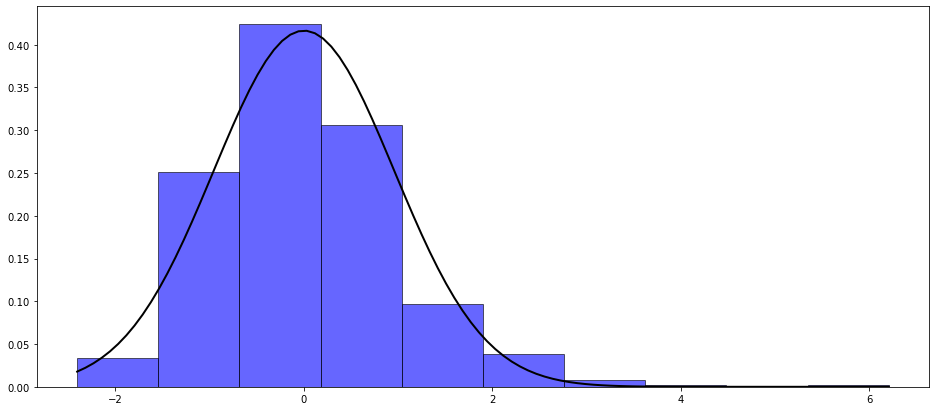

In [1821]:
plt.figure(figsize=(16,7))
plt.hist(residue, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(residue), max(residue)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(residue), np.std(residue)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [1822]:
from scipy import stats
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residue)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9604973793029785
Wartość P-Value: 2.63175370099565e-19


In [1823]:
jb = sms.jarque_bera(model.resid)
print("Statystyka testu Jarque-Bera:", jb[0])
print("Wartość P-Value:", jb[1])

Statystyka testu Jarque-Bera: 583.547267277271
Wartość P-Value: 1.9245134289512307e-127


<br>

In [1824]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 2007
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Yrs        1436 non-null   float64
 1   Const      1436 non-null   int64  
 2   Pk         1436 non-null   int64  
 3   G          1436 non-null   float64
 4   TOTMP      1436 non-null   float64
 5   TOTPTS     1436 non-null   float64
 6   TOTTRB     1436 non-null   float64
 7   TOTAST     1436 non-null   float64
 8   FG%        1436 non-null   float64
 9   3P%        1436 non-null   float64
 10  FT%        1436 non-null   float64
 11  WS/48      1436 non-null   float64
 12  BPM        1436 non-null   float64
 13  VORP       1436 non-null   float64
 14  MPG        1436 non-null   float64
 15  PPG        1436 non-null   float64
 16  RPG        1436 non-null   float64
 17  APG        1436 non-null   float64
 18  DraftYear  1436 non-null   int64  
 19  Height     1436 non-null   float64
 20  Weight  

In [1825]:
data_matrix.corr().style.applymap(highlight_high_corr)

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
Yrs,1.000000,nan,-0.394840,0.974604,0.916691,0.831763,0.812991,0.688020,0.313035,0.099306,0.188795,0.453689,0.525904,0.621469,0.663474,0.569439,0.530993,0.398118,-0.397522,0.021122,0.145044
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,-0.394840,nan,1.000000,-0.416770,-0.444551,-0.444171,-0.417427,-0.347996,-0.199171,-0.088319,-0.120174,-0.225456,-0.309056,-0.325493,-0.546301,-0.529276,-0.453833,-0.339129,0.076684,-0.045483,-0.126979
G,0.974604,nan,-0.416770,1.000000,0.960386,0.877871,0.844164,0.736798,0.308831,0.125462,0.217688,0.461289,0.546720,0.666997,0.715778,0.621749,0.555288,0.449976,-0.359412,0.011846,0.119382
TOTMP,0.916691,nan,-0.444551,0.960386,1.000000,0.958418,0.869324,0.817815,0.266930,0.160576,0.240557,0.449388,0.568830,0.788990,0.783746,0.727963,0.582263,0.546157,-0.304400,0.000721,0.075696
TOTPTS,0.831763,nan,-0.444171,0.877871,0.958418,1.000000,0.830666,0.817154,0.245725,0.184475,0.264290,0.442115,0.574218,0.865225,0.767386,0.807969,0.563260,0.567824,-0.242370,-0.002848,0.065112
TOTTRB,0.812991,nan,-0.417427,0.844164,0.869324,0.830666,1.000000,0.562214,0.382160,-0.032122,0.064696,0.467071,0.514117,0.724482,0.662427,0.613863,0.803149,0.299689,-0.263817,0.076668,0.320957
TOTAST,0.688020,nan,-0.347996,0.736798,0.817815,0.817154,0.562214,1.000000,0.109345,0.220351,0.271822,0.340209,0.504312,0.789844,0.651362,0.640353,0.298919,0.810058,-0.205138,-0.153083,-0.173145
FG%,0.313035,nan,-0.199171,0.308831,0.266930,0.245725,0.382160,0.109345,1.000000,-0.047865,-0.116393,0.741245,0.585311,0.197416,0.315340,0.306114,0.543581,0.035930,0.001979,0.094944,0.390688
3P%,0.099306,nan,-0.088319,0.125462,0.160576,0.184475,-0.032122,0.220351,-0.047865,1.000000,0.350044,0.175314,0.330488,0.148707,0.275402,0.299666,-0.106499,0.316143,0.186480,-0.112983,-0.361488


<br>

#### Usunięcie obserwacji odstających

In [1826]:
q1 = np.percentile(model.resid, 25)
q3 = np.percentile(model.resid, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = model.resid[(model.resid < lower_bound) | (model.resid > upper_bound)]
print("Wartości odstające:", outliers)

Wartości odstające: [2.76430702 2.55981935 2.38441825 2.53839607 3.05075918 2.62547762
 3.30452437 2.48357849 3.02816158 3.06640938 6.20483108 3.20723458
 3.69986169 5.64892392 2.40297412 2.62023991 3.18715718 2.69955807
 3.26706965 2.32696587 3.40240974 2.72311562 2.34680066 3.07204041
 2.48854463 2.7129669  2.37429214 2.33977797 4.07196785 2.35034894
 2.32401443]


In [1827]:
outliers_id = np.where((model.resid < lower_bound) | (model.resid > upper_bound))
print("Indeksy obserwacji odstających:", outliers_id)

Indeksy obserwacji odstających: (array([   0,   23,  105,  107,  136,  174,  206,  211,  214,  229,  291,
        363,  375,  381,  397,  422,  430,  438,  466,  468,  619,  633,
        733,  757,  767,  773,  795, 1044, 1060, 1147, 1195], dtype=int64),)


In [1828]:
df['id'] = range(len(df))
df_1 = df[~df['id'].isin([0, 23, 105,  107, 136, 174, 206, 211, 214, 229, 291, 363, 375, 381, 397, 422, 430, 438, 466, 468, 619, 633, 733, 757, 767, 773, 795, 1044, 1060, 1147, 1195])]
df_1 = df_1.drop('id', axis=1)

<br>

## Ponowna estymacja (bez wartości odstających)

In [1829]:
# df_1 nie zawiera wartości odstających
new_order = ['Yrs'] + [col for col in df_1.columns if col != 'Yrs']
df_1 = df_1[new_order]
data_matrix_1 = df_1.drop(columns=['Tm', 'Player', 'Birth Date'])
data_matrix_1.insert(1, 'Const', 1)

In [1830]:
y1 = data_matrix_1['Yrs'].to_numpy()

In [1831]:
X1 = data_matrix_1.iloc[:, 1:].values
X1 = X1.astype(float)

In [1832]:
# Utworzenie modelu regresji liniowej
model = sm.OLS(y1, X1).fit()

In [1833]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2098.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:30:26   Log-Likelihood:                -1756.0
No. Observations:                1405   AIC:                             3552.
Df Residuals:                    1385   BIC:                             3657.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7527      5.719      6.252      0.000      24.534      46.971
x1             0.0003      0.002      0.195      0.845      -0.003       0.004
x2             0.0174      0.000     49.786      0.000       0.017       0.018
x3            -0.0002   2.49e-05     -6.989      0.000      -0.000      -0.000
x4             0.0001   3.66e-05      2.777      0.006    2.98e-05       0.000
x5          8.953e-06   5.43e-05      0.165      0.869   -9.76e-05       0.000
x6          3.747e-05   7.41e-05      0.506      0.613      -0.000       0.000
x7            -0.3922      0.594     -0.660      0.509      -1.558       0.773
x8            -0.0537      0.230     -0.234      0.815      -0.504       0.397
x9            -0.4402      0.261     -1.684      0.092      -0.953       0.073
x10           -0.2367      1.077     -0.220      0.826      -2.348       1.875
x11            0.0315      0.024      1.301      0.193      -0.016       0.079
x12           -0.0013      0.006     -0.229      0.819      -0.012       0.010
x13            0.0030      0.013      0.227      0.820      -0.023       0.029
x14           -0.0057      0.023     -0.251      0.802      -0.050       0.039
x15           -0.0123      0.039     -0.315      0.753      -0.089       0.064
x16           -0.0439      0.049     -0.894      0.371      -0.140       0.052
x17           -0.0171      0.003     -5.973      0.000      -0.023      -0.011
x18            0.0010      0.002      0.434      0.664      -0.004       0.006
x19            0.0037      0.003      1.241      0.215      -0.002       0.010
==============================================================================
Omnibus:                       30.458   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.117
Skew:                           0.367   Prob(JB):                     1.06e-07
Kurtosis:                       2.903   Cond. No.                     3.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

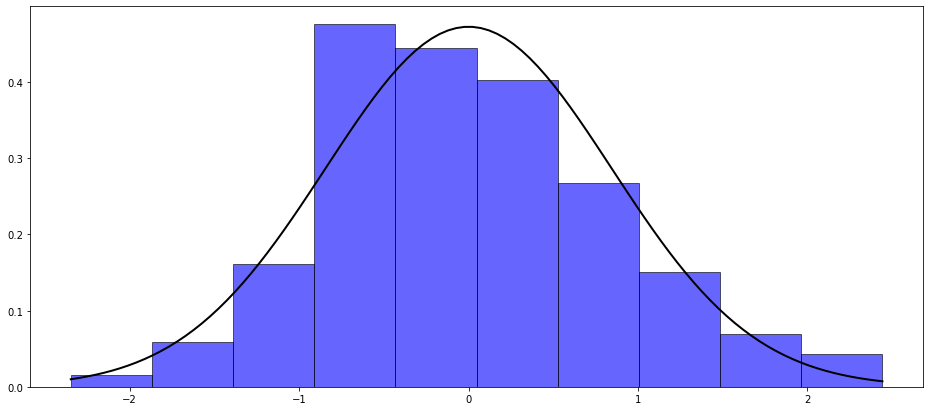

In [1834]:
plt.figure(figsize=(16,7))
plt.hist(model.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model.resid), max(model.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model.resid), np.std(model.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [1835]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9877963662147522
Wartość P-Value: 1.8106907084813884e-09


<br>

In [1836]:
X2 = data_matrix[[col for col in data_matrix.columns if col not in ['Yrs', 'TOTMP', 'TOTPTS', 'TOTTRB', 'TOTAST']]]
X2 = X2.astype(float)

In [1837]:
model1 = sm.OLS(y, X2).fit()

In [1838]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2031.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:30:27   Log-Likelihood:                -2007.3
No. Observations:                1436   AIC:                             4047.
Df Residuals:                    1420   BIC:                             4131.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const         43.5515      6.519      6.681      0.000      30.764      56.339
Pk            -0.0008      0.002     -0.383      0.702      -0.005       0.003
G              0.0144      0.000     93.181      0.000       0.014       0.015
FG%            0.3088      0.677      0.456      0.648      -1.018       1.636
3P%            0.0057      0.263      0.022      0.983      -0.510       0.522
FT%           -0.0567      0.297     -0.191      0.848      -0.639       0.525
WS/48         -1.2505      1.213     -1.031      0.303      -3.630       1.129
BPM            0.0666      0.027      2.491      0.013       0.014       0.119
VORP          -0.0183      0.004     -4.744      0.000      -0.026      -0.011
MPG           -0.0371      0.011     -3.283      0.001      -0.059      -0.015
PPG            0.0123      0.016      0.787      0.432      -0.018       0.043
RPG            0.0013      0.028      0.047      0.963      -0.053       0.055
APG           -0.0094      0.033     -0.281      0.779      -0.075       0.056
DraftYear     -0.0211      0.003     -6.457      0.000      -0.027      -0.015
Height         0.0003      0.003      0.110      0.912      -0.005       0.006
Weight         0.0091      0.003      2.682      0.007       0.002       0.016
==============================================================================
Omnibus:                      225.606   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.292
Skew:                           0.878   Prob(JB):                    8.59e-115
Kurtosis:                       5.386   Cond. No.                     5.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1839]:
round(model1.pvalues,3)

Const        0.000
Pk           0.702
G            0.000
FG%          0.648
3P%          0.983
FT%          0.848
WS/48        0.303
BPM          0.013
VORP         0.000
MPG          0.001
PPG          0.432
RPG          0.963
APG          0.779
DraftYear    0.000
Height       0.912
Weight       0.007
dtype: float64

In [1840]:
data_matrix[[col for col in data_matrix.columns if col not in ['Yrs', 'TOTMP', 'TOTPTS', 'TOTTRB', 'TOTAST']]].corr().style.applymap(highlight_high_corr)

,Const,Pk,G,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,nan,1.000000,-0.416770,-0.199171,-0.088319,-0.120174,-0.225456,-0.309056,-0.325493,-0.546301,-0.529276,-0.453833,-0.339129,0.076684,-0.045483,-0.126979
G,nan,-0.416770,1.000000,0.308831,0.125462,0.217688,0.461289,0.546720,0.666997,0.715778,0.621749,0.555288,0.449976,-0.359412,0.011846,0.119382
FG%,nan,-0.199171,0.308831,1.000000,-0.047865,-0.116393,0.741245,0.585311,0.197416,0.315340,0.306114,0.543581,0.035930,0.001979,0.094944,0.390688
3P%,nan,-0.088319,0.125462,-0.047865,1.000000,0.350044,0.175314,0.330488,0.148707,0.275402,0.299666,-0.106499,0.316143,0.186480,-0.112983,-0.361488
FT%,nan,-0.120174,0.217688,-0.116393,0.350044,1.000000,0.162859,0.229494,0.189644,0.340203,0.365528,-0.021937,0.338585,0.048731,-0.114886,-0.294410
WS/48,nan,-0.225456,0.461289,0.741245,0.175314,0.162859,1.000000,0.898066,0.426232,0.445676,0.452181,0.509656,0.250913,-0.032105,-0.014859,0.196048
BPM,nan,-0.309056,0.546720,0.585311,0.330488,0.229494,0.898066,1.000000,0.563367,0.613695,0.620660,0.500423,0.485841,-0.047380,-0.077392,0.000386
VORP,nan,-0.325493,0.666997,0.197416,0.148707,0.189644,0.426232,0.563367,1.000000,0.585622,0.659916,0.477310,0.549647,-0.150015,-0.036153,0.035440
MPG,nan,-0.546301,0.715778,0.315340,0.275402,0.340203,0.445676,0.613695,0.585622,1.000000,0.914229,0.682625,0.685482,-0.058170,0.001919,-0.000031


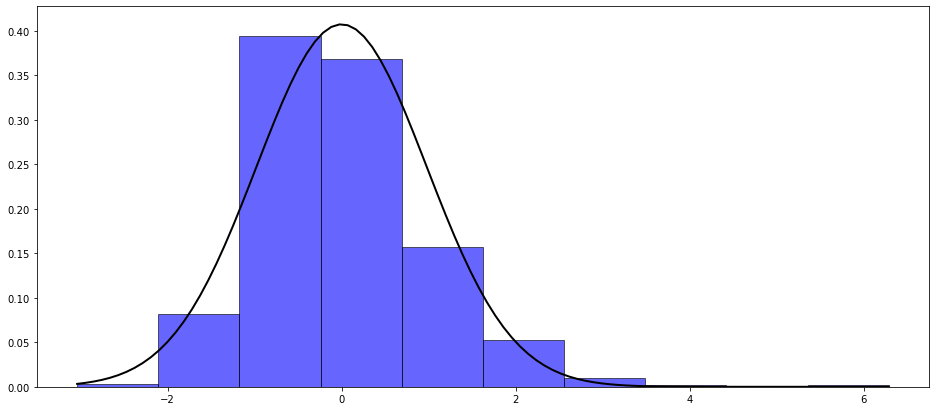

In [1841]:
plt.figure(figsize=(16,7))
plt.hist(model1.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model1.resid), max(model1.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model1.resid), np.std(model1.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [1842]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model1.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9641435146331787
Wartość P-Value: 2.2919704460305584e-18
